### <font color=green><b>MICROSOFT MOVIE STUDIO ANALYSIS</b></font> 

## Introduction

As a data analyst for Microsoft's new movie studio, my role is crucial in shaping the company's entry into the cinematic market. This analysis aims to identify the most profitable films and the studios associated with the highest profitability. Additionally, I will examine the impact of high production costs on a movie's domestic gross. Through this strategic approach, we I provide valuable insights to guide Microsoft's investments and decisions in the film industry



![movie_analysis](img-1.png) 

## Business problem

![business_problem](business_prob.png) 


Despite Microsoft's extensive experience in technology and software, the company lacks expertise in the film industry. To ensure a successful entry into the cinematic market, Microsoft needs to understand which types of films are currently excelling. This involves:-

- identify popular films and associated original languages.
- profit making films.
- identify competitor studios currently in the market.
- Analysis the return on investment on perfoming films.
- Analysis the effect of high production cost on domestic gross.

This requires a detailed analysis to minimize risks and maximize the potential for a success in the highly competitive movie industry. 

## Data understanding
For this analysis, I have been provided with various datasets to work on. As a data analyst, I will load these datasets to get a glimpse of each and decide which one I will use to answer the business problem.

- <font color=cyan>tmdb.movie</font>- This dataset provides insights into the film popularity, original language, and  dates of different film.
- <font color=cyan>bom.movie_gross</font>-This datasets helps identify top performing studios.
- <font color=cyan>m.movie_budget</font>-This dataset gives details on costs such as production, domestic and foreign which facilitates on the analysis  of return of investments on particular films.



## Loading data for  cleaning and analysis

Before I begin data cleaning and analysis, I will import the necessary libraries to facilitate my work. I will then load the identified datasets to get an initial overview of the data in each table. This preliminary step will help me determine which datasets should be merged, ultimately saving time on cleaning individual datasets and enabling a more efficient and comprehensive analysis.

In [1]:
#importing all necessary libraries for my analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3


In [3]:
#loading budget.csv dataset

df1 = pd.read_csv(r'moviedata\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv')
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The budget.scv dataset contains costs associated with the movie. This table is critical in anaysing, prpfitabilty and the return on investment on movies.

In [8]:
#loading budget.csv dataset
df2 = pd.read_csv(r'moviedata\zippedData\bom.movie_gross.csv\bom.movie_gross.csv')
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The above data set from the movie_gross.csv contains information on studio, coupled with movie title and related cost.
Domestics gross column is common in both df1 and df2.
Although the values may seem different due to domestic gross on df1 having the "$", I will first remove the dollar sign from this column and round to the nearest (-6), to match the values of df2 as illustrated below.

In [4]:
#removing the "$" from the values in the domestic gross collumn of df1
df1[['production_budget','domestic_gross','worldwide_gross']] = df1[['production_budget','domestic_gross','worldwide_gross']].apply(lambda x: pd.to_numeric(x.str.replace('[$,]', '')))
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [5]:
#rounding off the results to the nearest (-6)

df1['domestic_gross'] = (df1['domestic_gross'] / 1000000).round() * 1000000
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,761000000.0,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,43000000.0,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620000000.0,1316721747


Having succesfully achived this, i will now rename the title on df2 to movie, to match with the movie column in df1.

In [9]:
#renaming columns.
df2.rename(columns={"title":"movie"}, inplace=1)
df2.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


For a qualitative analysis, I will proceed on merging df1 and df2 based on the movie column. This approach will not only reduce the time required for analysis but also underscore the importance of integrating datasets. By merging the datasets, I am able to leverage a more comprehensive dataset, allowing for a deeper and more accurate analysis of the data.

In [10]:
df1_df2_merged= pd.merge(df1, df2, on='movie', how='inner')
df1_df2_merged

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,678800000.0,"1,369.50",2018
3,9,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000,200000000.0,879620923,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...
1242,68,"Apr 27, 2012",Sound of My Voice,135000,0.0,429448,FoxS,408000.0,NaN,2012
1243,73,"Jun 15, 2012",Your Sister's Sister,120000,2000000.0,3090593,IFC,1600000.0,NaN,2012
1244,80,"Jul 10, 2015",The Gallows,100000,23000000.0,41656474,WB (NL),22800000.0,20200000,2015
1245,86,"Jul 7, 2017",A Ghost Story,100000,2000000.0,2769782,A24,1600000.0,NaN,2017


In [11]:
#dropping dupplicate collumn form the merged dataset

df1_df2_merged.drop(columns=['domestic_gross_y'], axis=1, inplace=True)

In [12]:
#running cells after dropping the duplicate column
df1_df2_merged.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875,BV,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963,BV,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018
3,9,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000,200000000.0,879620923,Sony,680600000,2015


In [15]:
#loading budget.csv dataset
df3 = pd.read_csv(r'moviedata\zippedData\tmdb.movies.csv\tmdb.movies.csv')
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


My third dataset contains more information about the movie as shown above.
I will rename the title column to movie then continue of performing a merge based on this collumn.

In [16]:
#renaming title to movie.
df3.rename(columns={"title":"movie"},inplace=True)
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
#merging the merged_cost dataset with the df_3 dataset
df1_df2_df3_merged= pd.merge(df1_df2_merged, df3, on='movie', how='inner')
df1_df2_df3_merged.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875,BV,804600000,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963,BV,946400000,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
3,9,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
4,9,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510


From the output produced from merging my three datasets. I will perform the following data techniques to give a more correct vizualization for the analysis.
Here are the listed cleaning techniques that i will employ.
- Changing the name of my entire dataframe.
- Dropping dupicated and unnecessary columns.
- Renaming columns.
- Case convrsion.
- checking for empty rows

In [15]:
df1_df2_df3_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               1395 non-null   int64  
 1   release_date_x     1395 non-null   object 
 2   movie              1395 non-null   object 
 3   production_budget  1395 non-null   int64  
 4   domestic_gross_x   1395 non-null   float64
 5   worldwide_gross    1395 non-null   int64  
 6   studio             1394 non-null   object 
 7   foreign_gross      1200 non-null   object 
 8   year               1395 non-null   int64  
 9   Unnamed: 0         1395 non-null   int64  
 10  genre_ids          1395 non-null   object 
 11  id_y               1395 non-null   int64  
 12  original_language  1395 non-null   object 
 13  original_title     1395 non-null   object 
 14  popularity         1395 non-null   float64
 15  release_date_y     1395 non-null   object 
 16  vote_average       1395 

In [18]:
#Droppig unnnesary column and renaming my merged daaset.
df1_df2_df3_merged.drop(columns=["id_x", "Unnamed: 0", "genre_ids", "id_y", "original_title", "release_date_y"], inplace=True)
df = df1_df2_df3_merged
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1395 non-null   object 
 1   movie              1395 non-null   object 
 2   production_budget  1395 non-null   int64  
 3   domestic_gross_x   1395 non-null   float64
 4   worldwide_gross    1395 non-null   int64  
 5   studio             1394 non-null   object 
 6   foreign_gross      1200 non-null   object 
 7   year               1395 non-null   int64  
 8   original_language  1395 non-null   object 
 9   popularity         1395 non-null   float64
 10  vote_average       1395 non-null   float64
 11  vote_count         1395 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 141.7+ KB


In [19]:
#renaming columns
df.rename(columns={"release_date_x": "release_date", "domestic_gross_x": "domestic_gross"}, inplace=True)
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,original_language,popularity,vote_average,vote_count
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875,BV,804600000,2011,en,30.579,6.4,8571
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963,BV,946400000,2015,en,44.383,7.3,13457
2,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,en,80.773,8.3,13948
3,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,en,34.953,6.2,7510
4,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,en,34.953,6.2,7510


In [20]:
#converting all my column name from lowercase to upper case.
df.columns = [col.capitalize() for col in df.columns]
df.head()


,Release_date,Movie,Production_budget,Domestic_gross,Worldwide_gross,Studio,Foreign_gross,Year,Original_language,Popularity,Vote_average,Vote_count
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875,BV,804600000,2011,en,30.579,6.4,8571
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963,BV,946400000,2015,en,44.383,7.3,13457
2,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,en,80.773,8.3,13948
3,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,en,34.953,6.2,7510
4,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,en,34.953,6.2,7510


Now I want to perform deleting of duplicate rows. Before delete these rowss, i will run the info comnand just to get an overview of of the number of rows, and seethe effect after I delete the duplicates.

In [21]:
#before deleting duplicates

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_date       1395 non-null   object 
 1   Movie              1395 non-null   object 
 2   Production_budget  1395 non-null   int64  
 3   Domestic_gross     1395 non-null   float64
 4   Worldwide_gross    1395 non-null   int64  
 5   Studio             1394 non-null   object 
 6   Foreign_gross      1200 non-null   object 
 7   Year               1395 non-null   int64  
 8   Original_language  1395 non-null   object 
 9   Popularity         1395 non-null   float64
 10  Vote_average       1395 non-null   float64
 11  Vote_count         1395 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 141.7+ KB


In [22]:
#after deleting duplicates.

df_without_duplicates = df.drop_duplicates()
df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_date       1271 non-null   object 
 1   Movie              1271 non-null   object 
 2   Production_budget  1271 non-null   int64  
 3   Domestic_gross     1271 non-null   float64
 4   Worldwide_gross    1271 non-null   int64  
 5   Studio             1270 non-null   object 
 6   Foreign_gross      1097 non-null   object 
 7   Year               1271 non-null   int64  
 8   Original_language  1271 non-null   object 
 9   Popularity         1271 non-null   float64
 10  Vote_average       1271 non-null   float64
 11  Vote_count         1271 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 129.1+ KB


The above results shows a table with reduced number of rows on each column indicatingthat duplicate rows have been successfully removed.

In [23]:
#creating a copy of the data with no deleted duplicates, to perform the required analysis.
df = df_without_duplicates
df.head()


,Release_date,Movie,Production_budget,Domestic_gross,Worldwide_gross,Studio,Foreign_gross,Year,Original_language,Popularity,Vote_average,Vote_count
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241000000.0,1045663875,BV,804600000,2011,en,30.579,6.4,8571
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459000000.0,1403013963,BV,946400000,2015,en,44.383,7.3,13457
2,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,en,80.773,8.3,13948
3,"Nov 17, 2017",Justice League,300000000,229000000.0,655945209,WB,428900000,2017,en,34.953,6.2,7510
5,"Nov 6, 2015",Spectre,300000000,200000000.0,879620923,Sony,680600000,2015,en,30.318,6.4,6719


### <font color=gray>Data Analyisis</font>

From the merged dataset, I aim to capture the following insights for the analysis:
- most profitable films.
- identify the original language of popular films.
- competition in the industry.
- production costs vs profits.




### <font color=gray>Analysing most profitable films</font>




In [25]:
#creating a copy of the dataframe to calculate for profitability.

df = df.copy()

# Create a new column to calculate the most profitable films using .loc

df.loc[:, 'Film_by_profitability'] = df['Worldwide_gross'] - df['Production_budget']

# Sorting the DataFrame by Film_by_profitability in descending order

profitable_films = df.sort_values(by='Film_by_profitability', ascending=False)


profitable_films.head()



,Release_date,Movie,Production_budget,Domestic_gross,Worldwide_gross,Studio,Foreign_gross,Year,Original_language,Popularity,Vote_average,Vote_count,Film_by_profitability
2,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,en,80.773,8.3,13948,1748134200
23,"Jun 12, 2015",Jurassic World,215000000,652000000.0,1648854864,Uni.,"1,019.40",2015,en,20.709,6.6,14056,1433854864
48,"Apr 3, 2015",Furious 7,190000000,353000000.0,1518722794,Uni.,"1,163.00",2015,en,20.396,7.3,6538,1328722794
31,"Feb 16, 2018",Black Panther,200000000,700000000.0,1348258224,BV,646900000,2018,en,2.058,5.1,11,1148258224
32,"Feb 16, 2018",Black Panther,200000000,700000000.0,1348258224,BV,646900000,2018,en,44.140,7.4,12365,1148258224


After loading this new table showing films which generated the hightest profits, i realise that we have duplicate movie infomation with different populary, avg count and vote counts.
To get am more accurage analysis on this, i will proceed  on removing this columns and droping duplicates.

In [26]:
#removing unnecessary column in the profitable film dataset.

profitable_films.drop(columns=(['Popularity','Vote_average','Vote_count']), inplace=True)
profitable_films.head()

,Release_date,Movie,Production_budget,Domestic_gross,Worldwide_gross,Studio,Foreign_gross,Year,Original_language,Film_by_profitability
2,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,en,1748134200
23,"Jun 12, 2015",Jurassic World,215000000,652000000.0,1648854864,Uni.,"1,019.40",2015,en,1433854864
48,"Apr 3, 2015",Furious 7,190000000,353000000.0,1518722794,Uni.,"1,163.00",2015,en,1328722794
31,"Feb 16, 2018",Black Panther,200000000,700000000.0,1348258224,BV,646900000,2018,en,1148258224
32,"Feb 16, 2018",Black Panther,200000000,700000000.0,1348258224,BV,646900000,2018,en,1148258224


In [27]:
#deleting duplicate in the profitable_films tdataset.

profitable_film_table = profitable_films.drop_duplicates()
profitable_film_table.head()

,Release_date,Movie,Production_budget,Domestic_gross,Worldwide_gross,Studio,Foreign_gross,Year,Original_language,Film_by_profitability
2,"Apr 27, 2018",Avengers: Infinity War,300000000,679000000.0,2048134200,BV,"1,369.50",2018,en,1748134200
23,"Jun 12, 2015",Jurassic World,215000000,652000000.0,1648854864,Uni.,"1,019.40",2015,en,1433854864
48,"Apr 3, 2015",Furious 7,190000000,353000000.0,1518722794,Uni.,"1,163.00",2015,en,1328722794
31,"Feb 16, 2018",Black Panther,200000000,700000000.0,1348258224,BV,646900000,2018,en,1148258224
79,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,418000000.0,1305772799,Uni.,891800000,2018,en,1135772799


In [28]:
#showing the most profitable films

most_profitable_films = profitable_film_table[["Movie","Original_language","Film_by_profitability"]]
most_profitable_films.head()

,Movie,Original_language,Film_by_profitability
2,Avengers: Infinity War,en,1748134200
23,Jurassic World,en,1433854864
48,Furious 7,en,1328722794
31,Black Panther,en,1148258224
79,Jurassic World: Fallen Kingdom,en,1135772799


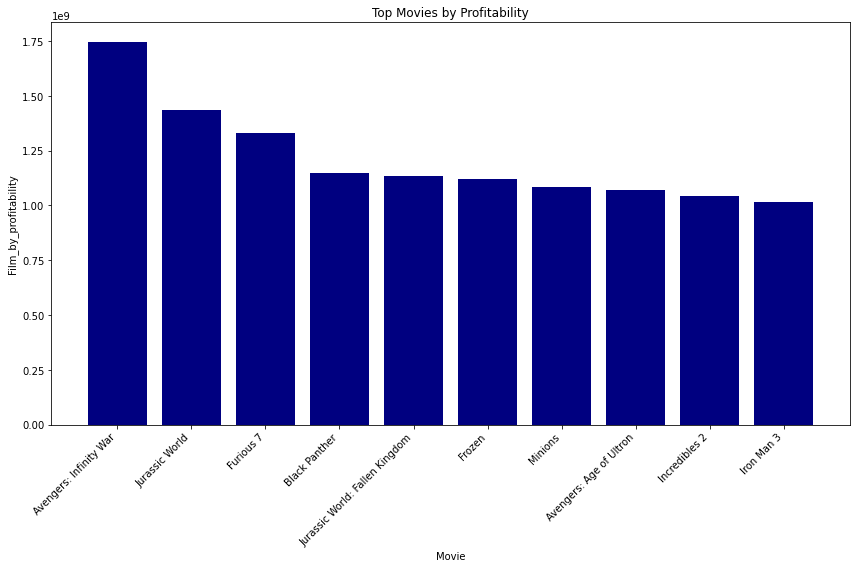

In [29]:
#plotting a graph to show the top 10 most profitalbe movies.

# Extracting a subset of data for plotting.

subset_df = most_profitable_films[['Movie','Film_by_profitability']].head(10)

# Create a bar plot

plt.figure(figsize=(12, 8))
plt.bar(subset_df['Movie'], subset_df['Film_by_profitability'], color='navy')
plt.xlabel('Movie')
plt.ylabel('Film_by_profitability')
plt.title('Top Movies by Profitability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

The graph clearly shows most profitable film. with profits shown in the table above it.

### <font color=gray>Competitors analysis</font>
Analysing studios which made the most profits.

In [27]:
#creating a dataset with studio and film 
most_profitable_studio = profitable_film_table[["Studio","Film_by_profitability"]]
most_profitable_studio.head()

,Studio,Film_by_profitability
2,BV,1748134200
23,Uni.,1433854864
48,Uni.,1328722794
31,BV,1148258224
79,Uni.,1135772799


Since different studios have produced more than one movie, I will proceed on grouping this studios and summing up the profits they made.

In [28]:
#grouping and adding profits made by different studios over different movies.

profits_by_studio= most_profitable_studio.groupby('Studio')['Film_by_profitability'].sum()


#Sorting the studios by profitability in descending order
profits_by_studio= profits_by_studio.sort_values(ascending=False)

profits_by_studio.head()

Studio
BV      24047086492
Uni.    20745207120
Fox     18967597007
WB      13814186677
Sony    12242208733
Name: Film_by_profitability, dtype: int64

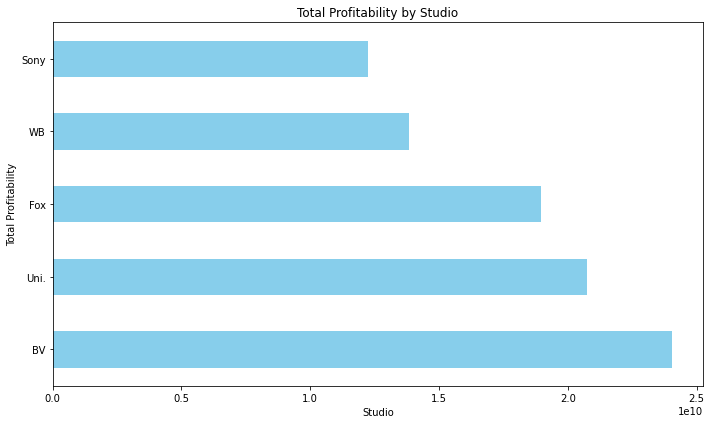

In [29]:
#vizualizing the output studio output

subset_studio = profits_by_studio.head(5)
# Create a bar plot
plt.figure(figsize=(10, 6))
subset_studio.plot(kind='barh', color='skyblue')
plt.xlabel('Studio')
plt.ylabel('Total Profitability')
plt.title('Total Profitability by Studio')
plt.tight_layout()

# Show plot
plt.show()


### <font color=gray>Analysing budget vs profitability</font>

In [32]:
# Selecting the columns to facilitate the analysis.

Production_budget_profitability = profitable_film_table[["Movie", "Production_budget", "Film_by_profitability"]]

#Sorting the DataFrame by 'Film_by_profitability' in descending order.

Production_budget_profitability = Production_budget_profitability.sort_values(by='Film_by_profitability', ascending=False)


print(Production_budget_profitability.head())

                             Movie  Production_budget  Film_by_profitability
2           Avengers: Infinity War          300000000             1748134200
23                  Jurassic World          215000000             1433854864
48                       Furious 7          190000000             1328722794
31                   Black Panther          200000000             1148258224
79  Jurassic World: Fallen Kingdom          170000000             1135772799


Now that we have shown production budget vs profitability. I will proceed on summing up this values separately and generating a pie to better visual reporting.

In [43]:
total_production_cost = Production_budget_profitability["Production_budget"].sum()
total_profitability = Production_budget_profitability["Film_by_profitability"].sum()

print(total_production_cost , total_profitability)

57525345023 129520002024


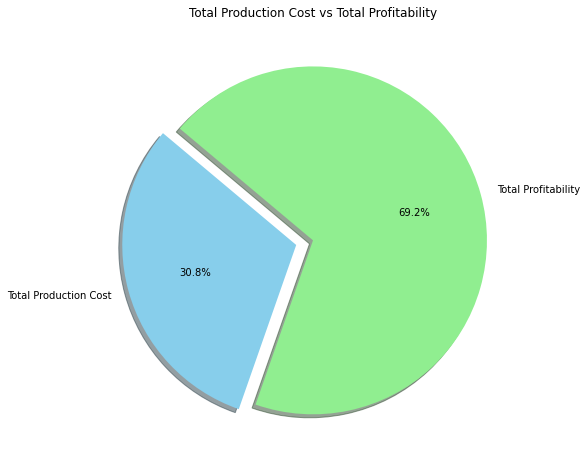

In [44]:

# Data for the pie chart
sizes = [total_production_cost, total_profitability]
labels = ['Total Production Cost', 'Total Profitability']
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Adding a title
plt.title('Total Production Cost vs Total Profitability')

# Show the plot
plt.show()

### Conclusions
- Benchmark on studios making most profits from movie production.

- Maximize producing movies in English as original language as the top profitable moves are in english.

- Invest in the production cost to maximize profits associated with particular movies.
